In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,45.0,27.0,31.0,0.0
1,85.0,64.0,59.0,32.0,NaN,0.0
2,86.0,54.0,33.0,16.0,54.0,0.0
3,91.0,78.0,34.0,24.0,36.0,0.0
4,NaN,55.0,13.0,17.0,17.0,NaN
...,...,...,...,...,...,...
340,91.0,54.0,25.0,22.0,35.0,4.0
341,NaN,48.0,32.0,22.0,14.0,4.0
342,85.0,52.0,22.0,23.0,34.0,4.0
343,95.0,93.0,21.0,27.0,47.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	22
float64		column 2	23
float64		column 3	45
float64		column 4	44
float64		column 5	34
float64		column 6	33


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,323.000000,322.000000,300.000000,301.000000,311.000000,312.000000
mean,90.173375,69.701863,30.036667,24.641196,37.147910,3.395833
std,4.381742,18.443429,19.477162,9.645595,37.781255,3.227377
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.500000,57.000000,20.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,92.000000,79.000000,33.000000,27.000000,43.000000,5.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

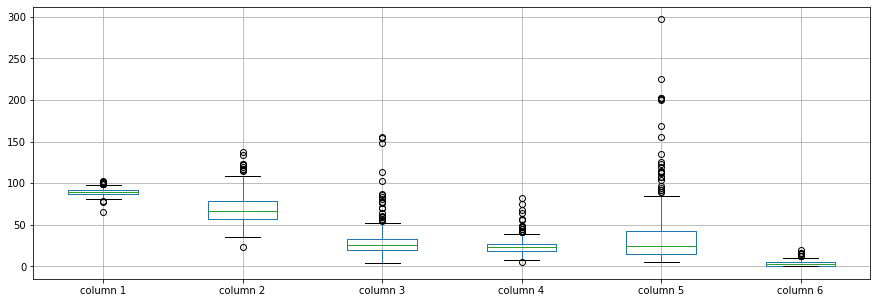

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    90.173375
column 2    69.701863
column 3    30.036667
column 4    24.641196
column 5    37.147910
column 6     3.395833
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.024904,0.136926,0.155591,0.173801,0.274137
column 2,0.024904,1.000000,0.035241,0.107551,0.168421,0.073769
column 3,0.136926,0.035241,1.000000,0.780483,0.437413,0.157690
column 4,0.155591,0.107551,0.780483,1.000000,0.444818,0.225675
column 5,0.173801,0.168421,0.437413,0.444818,1.000000,0.402222
column 6,0.274137,0.073769,0.157690,0.225675,0.402222,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+54,6+54+54,6+54+54+54,6+54+54+54+54,6+54+54+54,6+54+54,6+54,6], vae_layer = False, seed = 540)
imputer.build_model(df)
imputer.train_model(training_epochs=54)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 252.85257757277716
Epoch: 1 , loss: 253.1887737455822
Epoch: 2 , loss: 253.17941284179688
Epoch: 3 , loss: 252.34959193638392
Epoch: 4 , loss: 252.73402840750558
Epoch: 5 , loss: 254.3916989281064
Epoch: 6 , loss: 253.88758268810454
Epoch: 7 , loss: 253.55527024042038
Epoch: 8 , loss: 255.10741460890998
Epoch: 9 , loss: 252.87825084867933
Epoch: 10 , loss: 253.14141409737724
Epoch: 11 , loss: 252.28177533830916
Epoch: 12 , loss: 254.4804985409691
Epoch: 13 , loss: 253.2447255452474
Epoch: 14 , loss: 253.41098022460938
Epoch: 15 , loss: 253.39854576474144
Epoch: 16 , loss: 252.16780453636534
Epoch: 17 , loss: 247.89517865862166
Epoch: 18 , loss: 240.31682332356772
Epoch: 19 , loss: 228.66580345517113
Epoch: 20 , loss: 220.5507354736328
Epoch: 21 , loss: 213.96634565080916
Epoch: 22 , loss: 212.08505394345238
Epoch: 23 , loss: 201.72096833728608
Epoch: 24 , loss: 198.56387983049666
Epoch: 25 , loss: 194.8

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.000000
column 2    47.000000
column 3    11.449126
column 4    15.000000
column 5    18.000000
column 6     0.500000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,-1.086199,0.000000
2,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,-66.630613,0.0,0.0,0.0,0.000000,2.378038
...,...,...,...,...,...,...
340,0.000000,0.0,0.0,0.0,0.000000,0.000000
341,-88.800646,0.0,0.0,0.0,0.000000,0.000000
342,0.000000,0.0,0.0,0.0,0.000000,0.000000
343,0.000000,0.0,0.0,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

602.2208049325079

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [18]:
NRMS=numerator/denominator
NRMS


0.23899907330846423

In [19]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.000000,92.0,45.0,27.0,31.000000,0.000000
1,85.000000,64.0,59.0,32.0,21.913801,0.000000
2,86.000000,54.0,33.0,16.0,54.000000,0.000000
3,91.000000,78.0,34.0,24.0,36.000000,0.000000
4,31.369387,55.0,13.0,17.0,17.000000,2.378038
...,...,...,...,...,...,...
340,91.000000,54.0,25.0,22.0,35.000000,4.000000
341,0.199354,48.0,32.0,22.0,14.000000,4.000000
342,85.000000,52.0,22.0,23.0,34.000000,4.000000
343,95.000000,93.0,21.0,27.0,47.000000,6.000000


In [21]:
imputations[-1].to_excel("Bupa_NE_10(imp).xlsx", index=False, header=False)